In [16]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt

In [5]:
### Create a simple 5X5 grayscale image

input_image = np.array([
    [1,2,3,4,5],
    [5,4,3,2,1],
    [1,2,3,4,5],
    [5,4,3,2,1],
    [1,2,3,4,5],
],dtype= 'float32'
)

# Reshape to match the input shape expected by Conv2D: (batch_size, height, width, channels)
input_image = input_image.reshape((1, 5, 5, 1))

In [6]:
### Building the convolutional layer network

convo_layer_valid = Conv2D(filters=1, kernel_size= (3,3), strides= (1,1), padding= 'valid', input_shape= (5,5,1))

conv_layer_same = Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=(5, 5, 1))

c:\Users\disha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_valid = Sequential([convo_layer_valid])
model_same = Sequential([conv_layer_same])

# Define a custom kernel to visualize the effect (a simple edge detector)
kernel = np.array([[[[1]], [[0]], [[-1]]],
                   [[[1]], [[0]], [[-1]]],
                   [[[1]], [[0]], [[-1]]]], dtype='float32')

# Set the custom kernel as the weights for both layers (no bias)
model_valid.layers[0].set_weights([kernel, np.array([0])])
model_same.layers[0].set_weights([kernel, np.array([0])])

In [8]:
output_valid = model_valid.predict(input_image)

output_same = model_same.predict(input_image)


# Remove the batch dimension for easier plotting
output_valid = output_valid[0, :, :, 0]
output_same = output_same[0, :, :, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


### Plotting

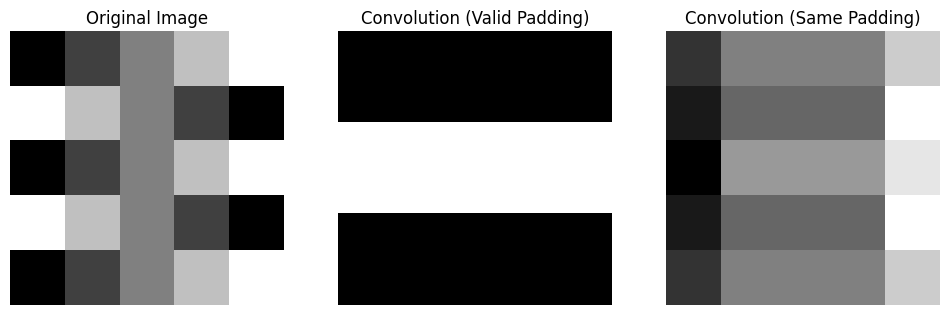

In [9]:
# Plot the original image and the feature maps
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(input_image[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Convolution (Valid Padding)")
plt.imshow(output_valid, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Convolution (Same Padding)")
plt.imshow(output_same, cmap='gray')
plt.axis('off')

plt.show()

### MNIST DATASET

In [10]:
from keras.datasets import mnist

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
model = Sequential()

model.add(Conv2D(32, kernel_size= (3,3), padding= 'valid', activation= 'relu', input_shape= (28, 28, 1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\disha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

### With padding Same

In [19]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\disha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)